In [6]:
!pip install pandas matplotlib openpyx
!pip install xlrd
!pip install folium geopandas
!pip install folium geopy
!pip install folium requests

ERROR: Could not find a version that satisfies the requirement openpyx (from versions: none)
ERROR: No matching distribution found for openpyx
  Obtaining dependency information for xlrd from https://files.pythonhosted.org/packages/a6/0c/c2a72d51fe56e08a08acc85d13013558a2d793028ae7385448a6ccdfae64/xlrd-2.0.1-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 4.8 MB/s eta 0:00:00
  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/ae/6d/18a7546e1748ecdd6ed7cd00d3f183faf1df08bd4f5e5e0eb3e72458b862/folium-0.17.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/c4/64/7d344cfcef5efddf9cf32f59af7f855828e9d74b5f862eddf5bfd9f25323/geopandas-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/fc/be/720f85abacd654ec86f1431bc7c004eae74417bd9d0e7a2bc43601062627/branca-0.8.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 5.5 MB/s eta 0:00:00


In [1]:
import pandas as pd

# Load the Excel file, skipping the first two rows
file_path = 'cleaned_final_data_result.csv'  # Update with your actual file path
df = pd.read_csv(file_path)

# Check the DataFrame structure after loading
print(df.head())
print(df.columns)


   Unnamed: 0.1                                          Job Title  \
0             0                               Quantitative Analyst   
1             1  Quantitative Marketing Analyst, Google, Search...   
2             3                            Quantitative Researcher   
3            10                     Principal Quantitative Analyst   
4            13              Analyst, Quantitative Data Operations   

                        Company       location       site    jobtype  \
0  American Century Investments    Santa Clara   LinkedIn  Full-time   
1                        Google  Mountain View   LinkedIn  Full-time   
2                     MSCI Inc.       Berkeley  Glassdoor  Full-time   
3      Pacific Gas and Electric        Oakland   JobzMall  Full-time   
4          Fidelity Investments  San Francisco   JobzMall  Full-time   

   health_insurance  Dental_insurance  years of experience  benefits_401k  \
0                 0                 0                    0           

In [7]:
print(df.head())

                                           Job Title  \
0                               Quantitative Analyst   
1  Quantitative Marketing Analyst, Google, Search...   
2                                      Quant Analyst   
3                            Quantitative Researcher   
4  Associate Quantitative Analytics and Forecasti...   

                                            Company       location       site  \
0                      American Century Investments    Santa Clara   LinkedIn   
1                                            Google  Mountain View   LinkedIn   
2  Software Guidance & Assistance, Inc. (SGA, Inc.)       San Jose   LinkedIn   
3                                         MSCI Inc.       Berkeley  Glassdoor   
4                                          Exelixis        Alameda   LinkedIn   

     jobtype  health_insurance  Dental_insurance  years of experience  \
0  Full-time                 0                 0                    0   
1  Full-time                 1

In [2]:
print(df.columns)

Index(['Unnamed: 0.1', 'Job Title', 'Company', 'location', 'site', 'jobtype',
       'health_insurance', 'Dental_insurance', 'years of experience',
       'benefits_401k', 'stocks', 'date_posted', 'lower_limit_salary',
       'upper_limit_salary'],
      dtype='object')


In [9]:
print(df.describe())

       health_insurance  Dental_insurance  years of experience  benefits_401k  \
count        659.000000        659.000000           659.000000     659.000000   
mean           0.544765          0.376328             3.283763       0.520486   
std            0.498370          0.484832             2.760979       0.499960   
min            0.000000          0.000000             0.000000       0.000000   
25%            0.000000          0.000000             0.000000       0.000000   
50%            1.000000          0.000000             3.000000       1.000000   
75%            1.000000          1.000000             5.000000       1.000000   
max            1.000000          1.000000             9.000000       1.000000   

           stocks  date_posted  lower_limit_salary  upper_limit_salary  
count  659.000000   659.000000          659.000000          659.000000  
mean     0.716237    17.388467       118370.810319       183581.591806  
std      0.451166    11.816257        61456.662506 

# Horizontal bar plot : Top 30 job sites with highest Job postings 

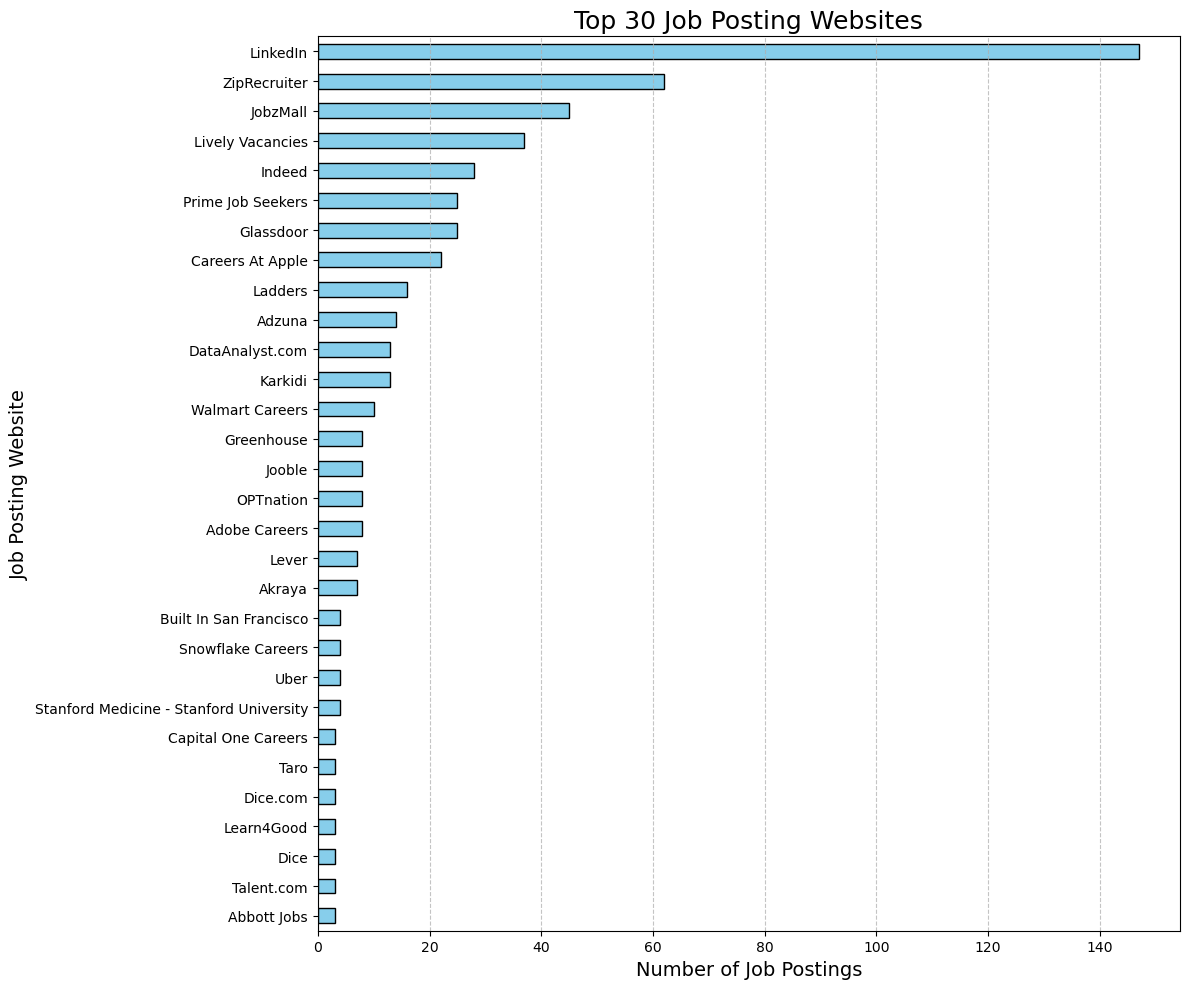

In [4]:
import matplotlib.pyplot as plt
# Count the number of job postings for each website
top_job_counts = df['site'].value_counts()

# Sort the Series in descending order and select the top 30
top_30_job_counts = top_job_counts.sort_values(ascending=False).head(30)

# Create a horizontal bar chart for the top 30 job posting websites
plt.figure(figsize=(12, 10))  # Adjust size to fit the data
top_30_job_counts.plot(kind='barh', color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Top 30 Job Posting Websites', fontsize=18)
plt.xlabel('Number of Job Postings', fontsize=14)
plt.ylabel('Job Posting Website', fontsize=14)

# Display grid lines for better readability
plt.grid(axis='x', alpha=0.75, linestyle='--')

# Invert the y-axis to have the largest count on top
plt.gca().invert_yaxis()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [13]:
print(df.columns)

Index(['Job Title', 'Company', 'location', 'site', 'jobtype',
       'health_insurance', 'Dental_insurance', 'years of experience',
       'benefits_401k', 'stocks', 'date_posted', 'lower_limit_salary',
       'upper_limit_salary'],
      dtype='object')


In [7]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Get unique values in the 'Location' column
unique_locations = df['location'].unique()
print("Unique locations:", unique_locations)

# Count of unique values
unique_location_count = df['location'].nunique()
print(f"Total unique locations: {unique_location_count}")


# Count the number of job postings by city
job_counts_by_city = df['location'].value_counts().reset_index()
job_counts_by_city.columns = ['City', 'Job Count']
print(job_counts_by_city)





Unique locations: ['Santa Clara' 'Mountain View' 'Berkeley' 'Oakland' 'San Francisco'
 'Palo Alto' 'Cupertino' 'San Bruno' 'Auburn' 'West Sacramento'
 'Los Angeles' 'United States • via LinkedIn' 'Anywhere • via Upwork'
 'United States • via Glassdoor' 'Jersey City' 'Madison'
 'United States • via Adzuna' 'Atlanta' 'Philadelphia' 'New York' 'Plano'
 'Irving' 'Scottsdale' 'Chicago' 'Miami' 'Boston' 'Seattle'
 'Anywhere • via Karkidi' 'Menlo Park' 'Alameda' 'Foster City'
 'Pleasanton' 'San Jose' 'Redwood City' 'Stanford' 'Fremont'
 'Anywhere • via ZipRecruiter' 'San Mateo' 'Folsom' 'Suisun City'
 'Fairfield' 'Avila Beach' 'Sunnyvale' 'Torrance' 'Fountain Valley'
 'Gold Beach' 'Newport Beach' 'South San Francisco' 'Santa Cruz'
 'Anywhere • via Y Combinator' 'Oxnard' 'Santa Rosa' 'Charlotte'
 'Long Beach' 'Boulder' 'Salt Lake City' 'Simi Valley' 'Raleigh' 'Concord'
 'Nashville' 'Mount Vernon' 'Campbell' 'Hollister' 'Lafayette'
 'San Carlos' 'Brentwood' 'San Rafael' 'Anywhere • via Motion R

In [8]:
import pandas as pd

# Assuming df is your DataFrame with the 'location' column

# Clean the 'location' column
df['location'] = df['location'].str.replace(r' • .*', '', regex=True)  # Remove unwanted text after ' • '
df['location'] = df['location'].str.strip()  # Strip leading and trailing whitespace

# Get the top 26 locations with the highest number of job postings
top_locations = df['location'].value_counts()
print(top_locations)
num_unique_locations = df['location'].nunique()
print(num_unique_locations)
top_locations = df['location'].value_counts().head(26)  # Count occurrences and take the top 50

# Display the top 26 locations with their counts
print("Top 26 locations with the highest number of job postings:")
print(top_locations)


location
San Francisco      84
Sunnyvale          48
San Jose           44
Anywhere           29
Mountain View      26
                   ..
Santa Monica        1
Irvine              1
La Puente           1
San Rafael          1
American Canyon     1
Name: count, Length: 149, dtype: int64
149
Top 26 locations with the highest number of job postings:
location
San Francisco          84
Sunnyvale              48
San Jose               44
Anywhere               29
Mountain View          26
Santa Clara            24
Cupertino              24
Palo Alto              22
Oakland                16
Seattle                14
New York               12
Stanford               11
South San Francisco    11
Berkeley               11
San Mateo              10
Menlo Park             10
Pleasanton              9
Alameda                 9
California              8
San Bruno               8
Redwood City            7
San Carlos              6
Fairfield               5
United States           5
Foster City    

# HEAT MAP FOR TOP 25 LOCATIONS WITH HIGHEST JOB POSTINGS

In [9]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Updated data with job postings and locations
data = {
    "Location": [
        "San Francisco", "Sunnyvale", "San Jose", "Mountain View",
        "Santa Clara", "Palo Alto", "Cupertino", "Oakland",
        "Seattle", "New York", "Stanford", "San Mateo",
        "South San Francisco", "Berkeley", "Menlo Park", 
        "Alameda", "Pleasanton", "San Bruno", "California", 
        "Redwood City", "San Carlos", "United States", "Campbell", 
        "Fairfield", "Newark"
    ],
    "Job_Postings": [
        90, 49, 46, 30, 
        25, 24, 24, 17, 
        15, 14, 12, 11, 
        11, 11, 11, 10, 
        9, 8, 8, 7, 
        6, 6, 5, 5, 
        5
    ],
    "Latitude": [
        37.7749, 37.3688, 37.3382, 37.3861,
        37.3541, 37.4419, 37.3230, 37.8049,
        47.6062, 40.7128, 37.4275, 37.4537,
        37.6454, 37.8715, 37.4537, 37.4275,
        37.5531, 37.6535, 36.7783, 36.7783,
        37.5532, 37.5483, 37.6620, 37.4512,
        40.7360
    ],
    "Longitude": [
        -122.4194, -122.0363, -121.8863, -122.0838,
        -121.9552, -122.1430, -122.0322, -122.2711,
        -122.3321, -74.0060, -122.1716, -122.2416,
        -122.4533, -122.2740, -122.2416, -122.2070,
        -121.8990, -121.9943, -119.4179, -119.4179,
        -122.4200, -121.4944, -121.4944, -121.8990,
        -74.1231
    ]
}

# Create a DataFrame
df_locations = pd.DataFrame(data)

# Check the lengths of each list
lengths = {key: len(value) for key, value in data.items()}
print("Lengths of each list:", lengths)

# Ensure all arrays have the same length
if len(set(lengths.values())) > 1:
    raise ValueError("All arrays must be of the same length")

# Create a Folium map centered around California
map_center = [37.25, -119.3]  # Approximate center of California
m = folium.Map(location=map_center, zoom_start=7)

# Prepare heatmap data
heat_data = [[row['Latitude'], row['Longitude'], row['Job_Postings']] for index, row in df_locations.iterrows()]

# Create and add HeatMap layer
HeatMap(heat_data).add_to(m)

# Save the map to an HTML file
m.save('heatmap_top_locations.html')

# Display the map in Jupyter Notebook (if running in Jupyter)
m


Lengths of each list: {'Location': 25, 'Job_Postings': 25, 'Latitude': 25, 'Longitude': 25}


In [10]:
# Optionally, filter out any rows with missing jobtype information
df = df[df['jobtype'].notna()]


In [11]:
# Count occurrences of each job type
job_counts = df['jobtype'].value_counts()

# Display counts for remote and on-site jobs
print(job_counts)

jobtype
Full-time                               506
Full-time and Part-time                  52
Contractor                               49
Part-time                                 8
Full-time and Contractor                  4
Full-time, Part-time, and Contractor      2
Internship                                1
Full-time, Part-time, and Internship      1
Name: count, dtype: int64


# Proportion of Job types

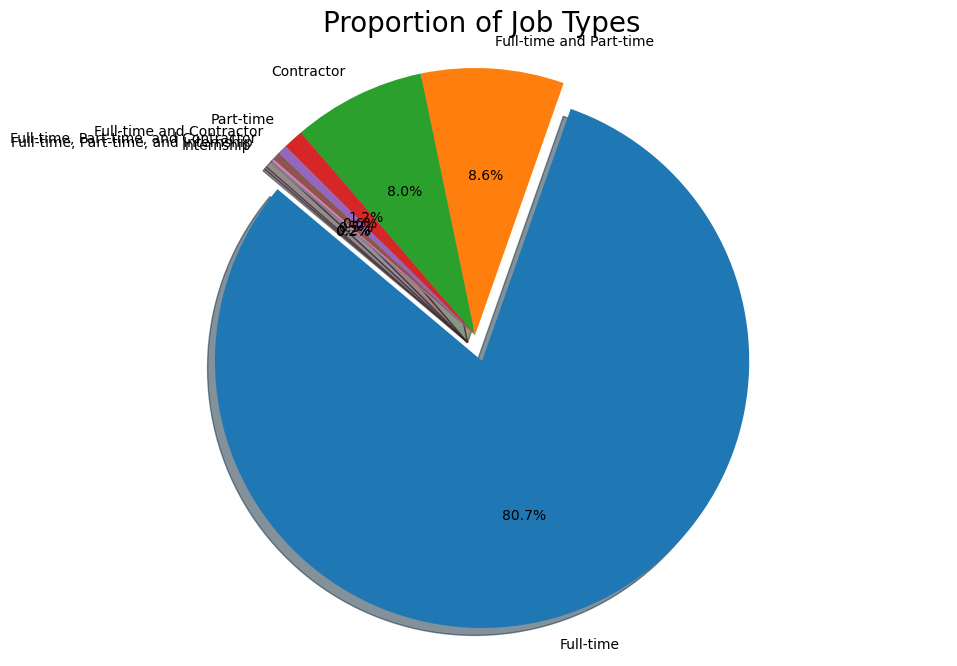

In [12]:
import matplotlib.pyplot as plt

# Assuming job_counts is already defined as follows
# job_counts = df['jobtype'].value_counts()

# Example job_counts data based on your output
job_counts = pd.Series({
    'Full-time': 532,
    'Full-time and Part-time': 57,
    'Contractor': 53,
    'Part-time': 8,
    'Full-time and Contractor': 4,
    'Full-time, Part-time, and Contractor': 3,
    'Full-time, Part-time, and Internship': 1,
    'Internship': 1
})

# Define the explode array to emphasize the first slice
explode = [0.1] + [0] * (len(job_counts) - 1)  # Explode only the first slice

# Create the pie chart
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plt.pie(
    job_counts,
    labels=job_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,  # Explode the first slice
    shadow=True  # Optional: adds a shadow for better aesthetics
)

# Title and equal aspect ratio
plt.title('Proportion of Job Types', fontsize=20)  # Increased title font size
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular

# Show the pie chart
plt.show()


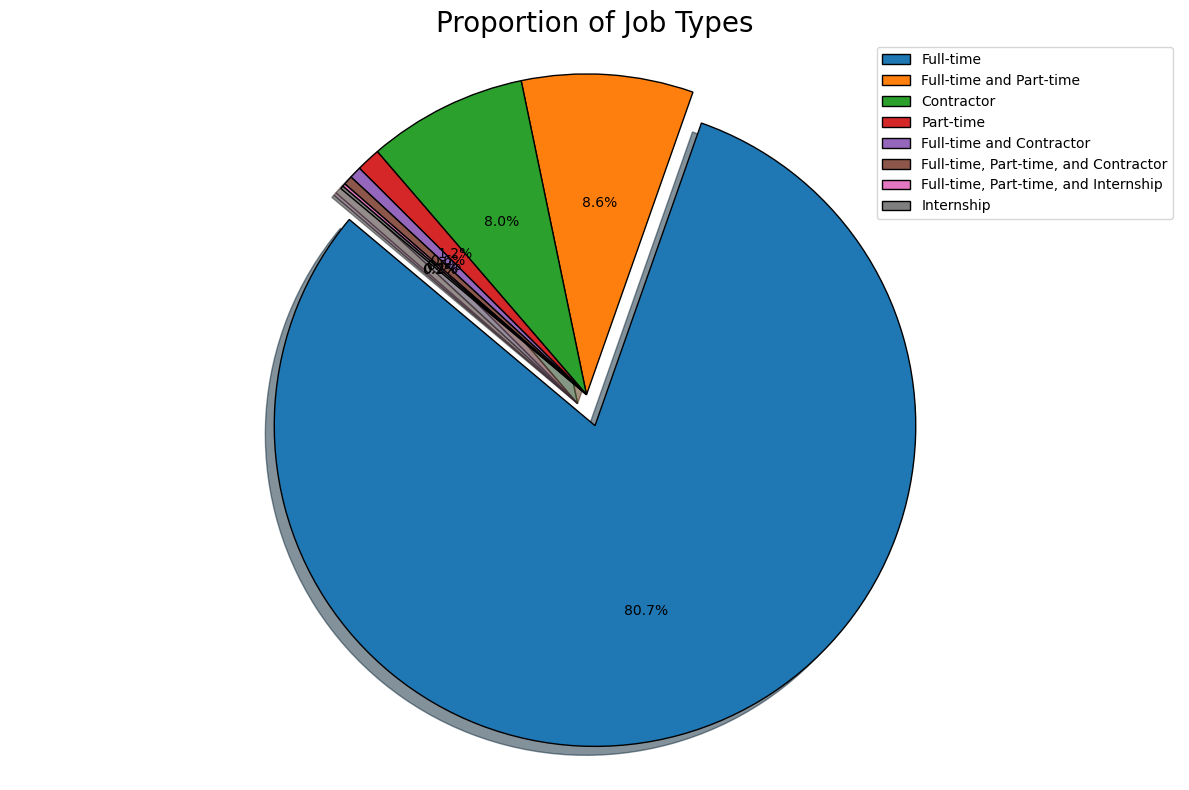

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example job_counts data
job_counts = pd.Series({
    'Full-time': 532,
    'Full-time and Part-time': 57,
    'Contractor': 53,
    'Part-time': 8,
    'Full-time and Contractor': 4,
    'Full-time, Part-time, and Contractor': 3,
    'Full-time, Part-time, and Internship': 1,
    'Internship': 1
})

# Define the explode array to emphasize the first slice
explode = [0.1] + [0] * (len(job_counts) - 1)  # Explode only the first slice

# Create the pie chart
fig, ax = plt.subplots(figsize=(12, 8))
wedges, texts, autotexts = ax.pie(
    job_counts,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    shadow=True,
    labeldistance=1.1,  # Adjust label distance
    wedgeprops={'edgecolor': 'black'}  # Add black border around slices
)

# Adjust the angle for each label to follow the wedge direction
for i, text in enumerate(texts):
    angle = (wedges[i].theta2 + wedges[i].theta1) / 2
    x, y = np.cos(np.radians(angle)), np.sin(np.radians(angle))
    rotation_angle = angle if angle < 180 else angle + 180  # Adjust rotation

    # Place and rotate the text along the wedge direction
    ax.text(x, y, text.get_text(), rotation=rotation_angle, ha='center', va='center', 
            fontsize=10, fontstyle='italic', rotation_mode='anchor')
    
    # Remove the original labels from the pie
    text.set_text('')

# Improve percentage text readability
for autotext in autotexts:
    autotext.set_fontsize(10)

# Add a legend instead of directly labeling the pie slices
plt.legend(wedges, job_counts.index, loc="best", fontsize=10)

# Title and equal aspect ratio
plt.title('Proportion of Job Types', fontsize=20)
plt.axis('equal')

# Adjust layout to fit everything cleanly
plt.tight_layout()

# Show the pie chart
plt.show()

In [15]:
# Calculate job type counts
job_counts = df['jobtype'].value_counts().head(4)  # Get the top 4 job types
print(job_counts)


jobtype
Full-time                  506
Full-time and Part-time     52
Contractor                  49
Part-time                    8
Name: count, dtype: int64


jobtype
Full-time                  506
Full-time and Part-time     52
Contractor                  49
Part-time                    8
Name: count, dtype: int64


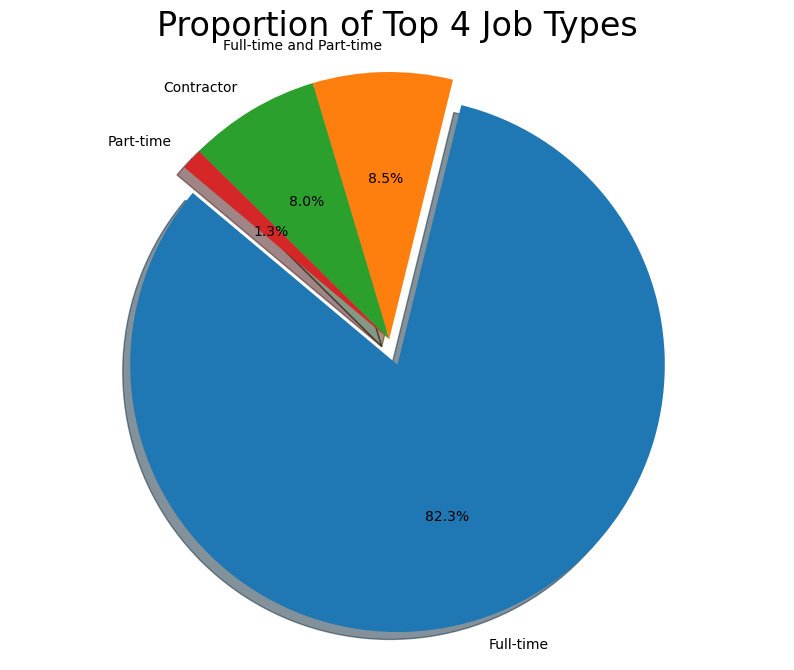

In [16]:
import matplotlib.pyplot as plt

print(job_counts)

# Create a pie chart for the top 4 job types
plt.figure(figsize=(10, 8))  # Adjusted size for better visibility
explode = (0.1, 0, 0, 0)  # "Explode" the first slice for emphasis

plt.pie(
    job_counts,
    labels=job_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,  # Separate the first slice slightly
    shadow=True  # Optional: adds a shadow for better aesthetics
)

plt.title('Proportion of Top 4 Job Types', fontsize=24)  # Increased title font size for better visibility
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()


In [17]:
import pandas as pd

# Define job types and their respective counts for the specified types
job_types = ['Full-time', 'Contractor', 'Part-time', 'Internship']
counts = [532, 53, 8, 1]  # Update counts according to your data

# Create a DataFrame
df_filtered_jobtypes = pd.DataFrame({
    'jobtype': job_types,
    'count': counts
})

# Display the DataFrame
print(df_filtered_jobtypes)


      jobtype  count
0   Full-time    532
1  Contractor     53
2   Part-time      8
3  Internship      1


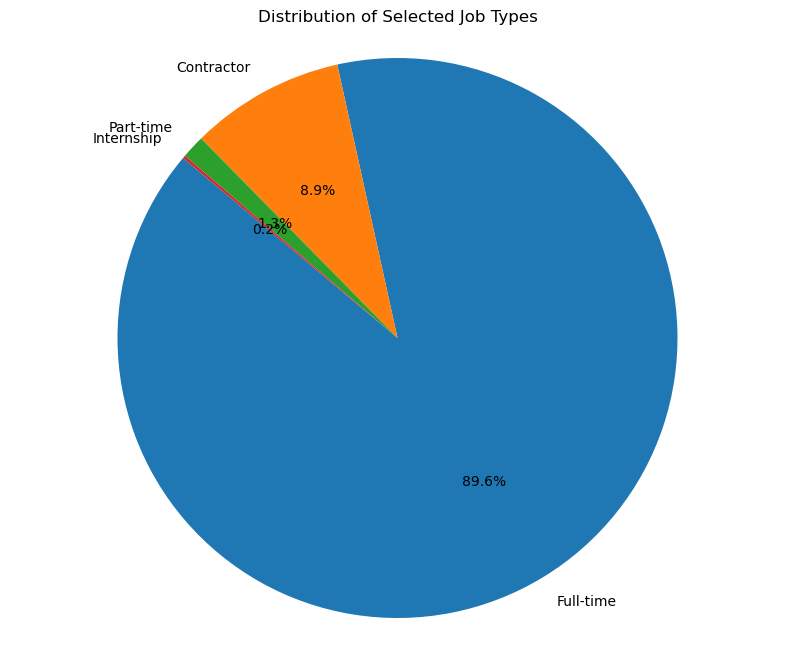

In [18]:
import matplotlib.pyplot as plt

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(df_filtered_jobtypes['count'], labels=df_filtered_jobtypes['jobtype'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Selected Job Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()


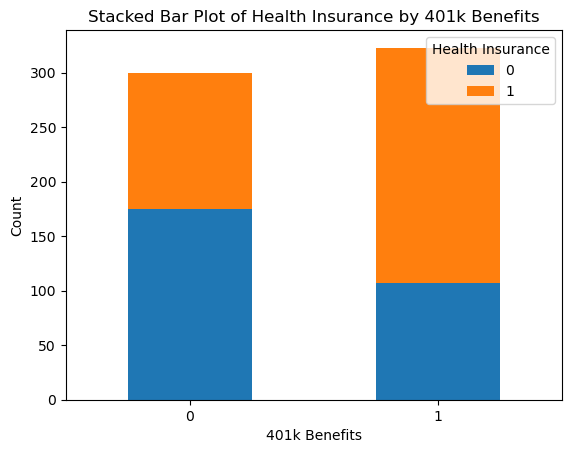

In [19]:
count_data = df.groupby(['benefits_401k', 'health_insurance']).size().unstack()
count_data.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Health Insurance by 401k Benefits')
plt.xlabel('401k Benefits')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Health Insurance')
plt.show()


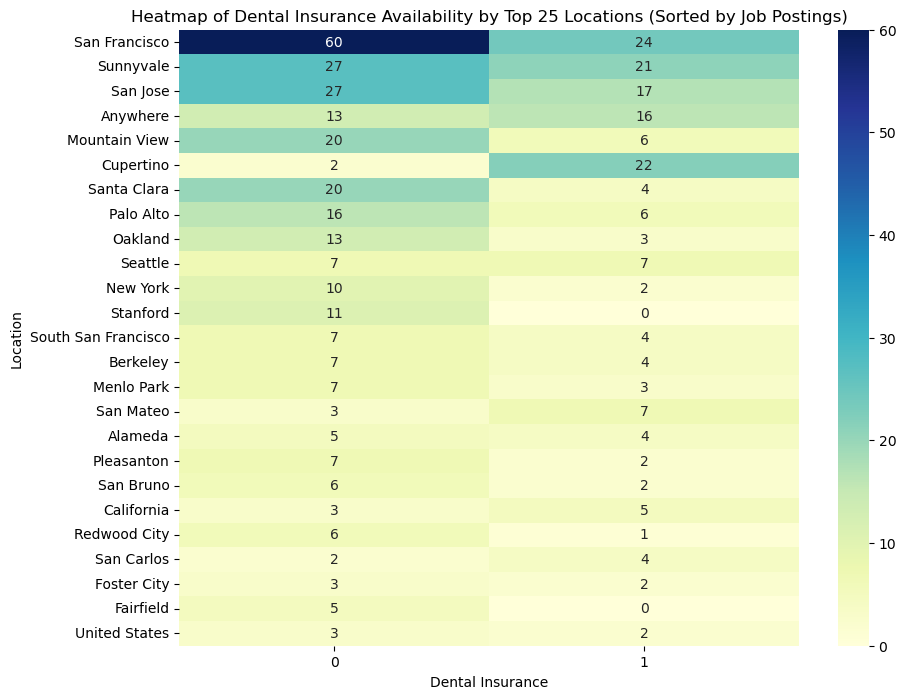

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
# Get top 25 locations by the number of job postings
top_25_locations = df['location'].value_counts().head(25).index


# Filter the DataFrame to include only rows from the top 25 locations
df_top_25 = df[df['location'].isin(top_25_locations)]


# Pivot the data for heatmap
heatmap_data_top_25 = df_top_25.pivot_table(index='location', columns='Dental_insurance', aggfunc='size', fill_value=0)

# Sort the pivot table in decreasing order by the total number of job postings
heatmap_data_top_25['Total_Postings'] = heatmap_data_top_25.sum(axis=1)
heatmap_data_top_25 = heatmap_data_top_25.sort_values(by='Total_Postings', ascending=False)
heatmap_data_top_25 = heatmap_data_top_25.drop(columns=['Total_Postings'])  # Drop the temporary column

# Plot the heatmap for the top 25 locations in decreasing order
plt.figure(figsize=(10, 8))  # Adjust size to fit 25 locations
sns.heatmap(heatmap_data_top_25, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Heatmap of Dental Insurance Availability by Top 25 Locations (Sorted by Job Postings)')
plt.xlabel('Dental Insurance')
plt.ylabel('Location')
plt.show()


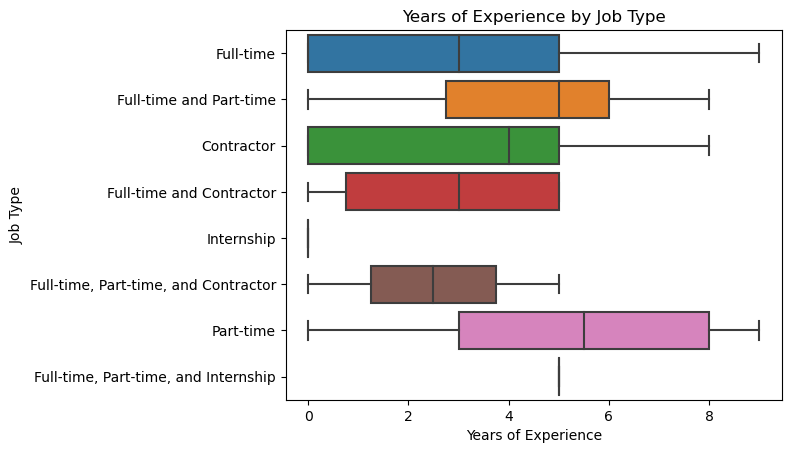

In [24]:
# Horizontal box plot
sns.boxplot(y='jobtype', x='years of experience', data=df)
plt.title('Years of Experience by Job Type')
plt.xlabel('Years of Experience')
plt.ylabel('Job Type')
plt.xticks(rotation=0)  # No need to rotate the x-axis labels
plt.show()


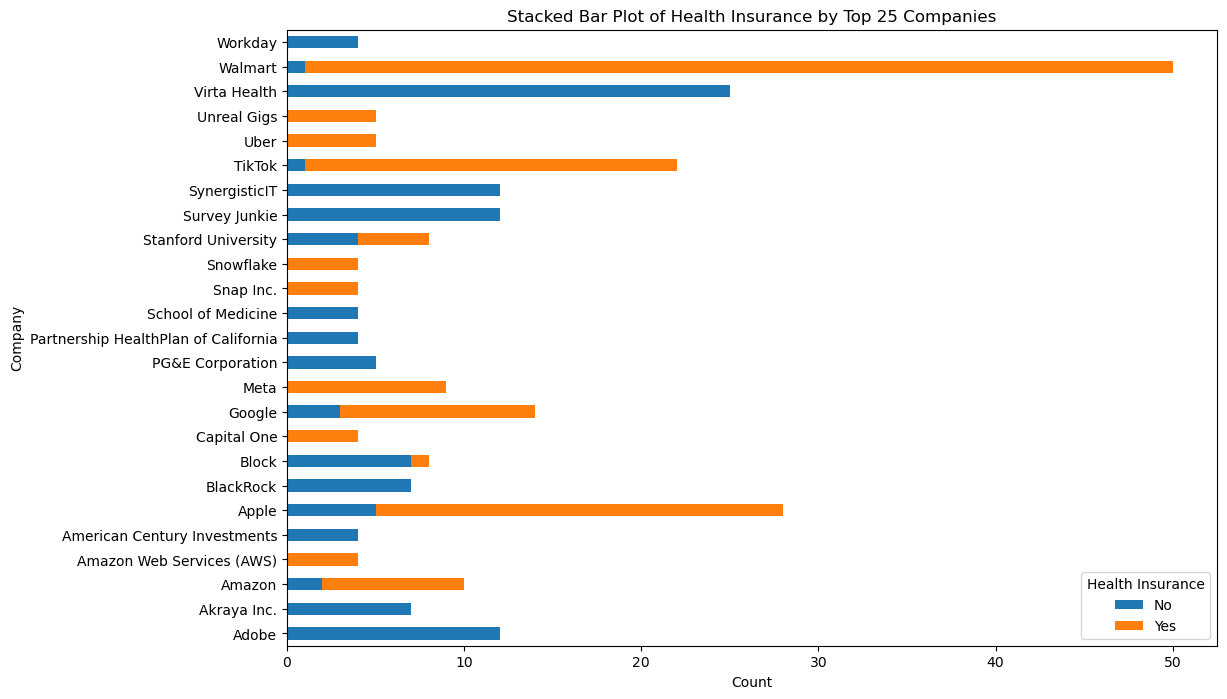

In [25]:
# Get the top 25 companies by the number of job postings
top_25_companies = df['Company'].value_counts().head(25).index

# Filter the DataFrame to include only rows from the top 25 companies
df_top_25 = df[df['Company'].isin(top_25_companies)]

# Create the health summary for the top 25 companies
health_summary_top_25 = df_top_25.groupby('Company')['health_insurance'].value_counts().unstack(fill_value=0)

# Plot the stacked bar plot for health insurance by the top 25 companies
health_summary_top_25.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.title('Stacked Bar Plot of Health Insurance by Top 25 Companies')
plt.xlabel('Count')
plt.ylabel('Company')
plt.legend(title='Health Insurance', labels=['No', 'Yes'])
plt.show()


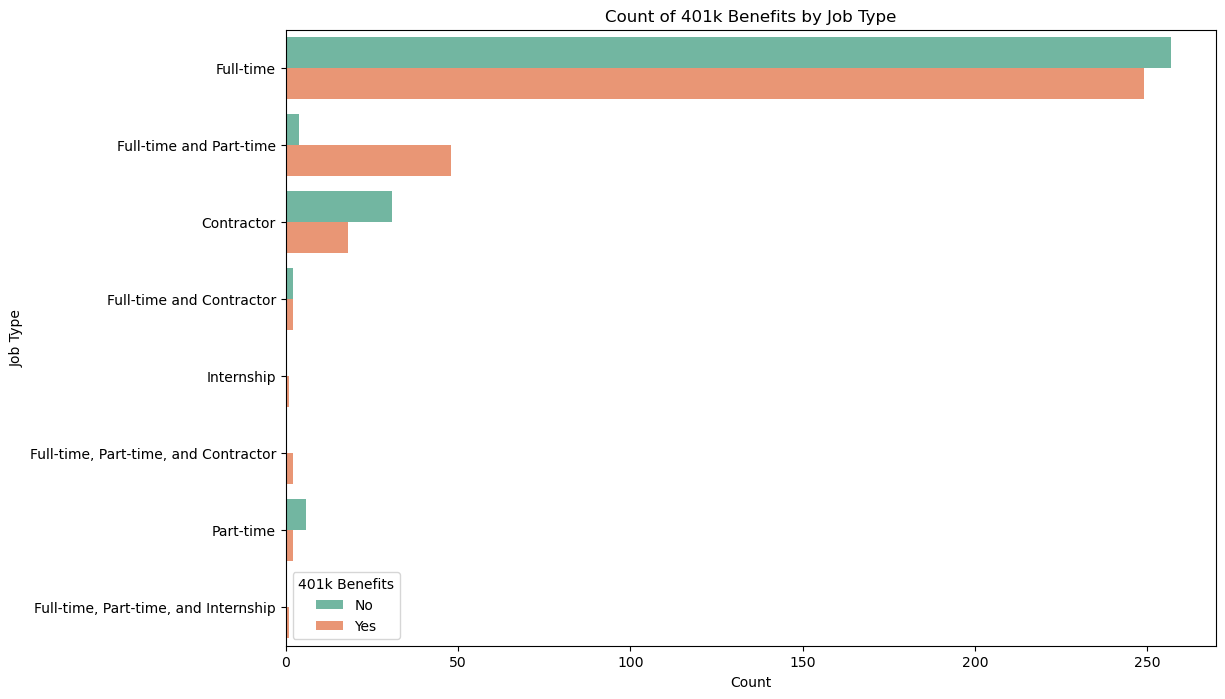

In [26]:
plt.figure(figsize=(12, 8))
sns.countplot(y='jobtype', hue='benefits_401k', data=df, palette='Set2')
plt.title('Count of 401k Benefits by Job Type')
plt.xlabel('Count')
plt.ylabel('Job Type')
plt.legend(title='401k Benefits', labels=['No', 'Yes'])
plt.show()


In [27]:
# Get top 25 locations by the number of job postings
top_25_locations = df['location'].value_counts().head(25).index

# Filter the DataFrame to include only rows from the top 25 locations
df_top_25 = df[df['location'].isin(top_25_locations)]


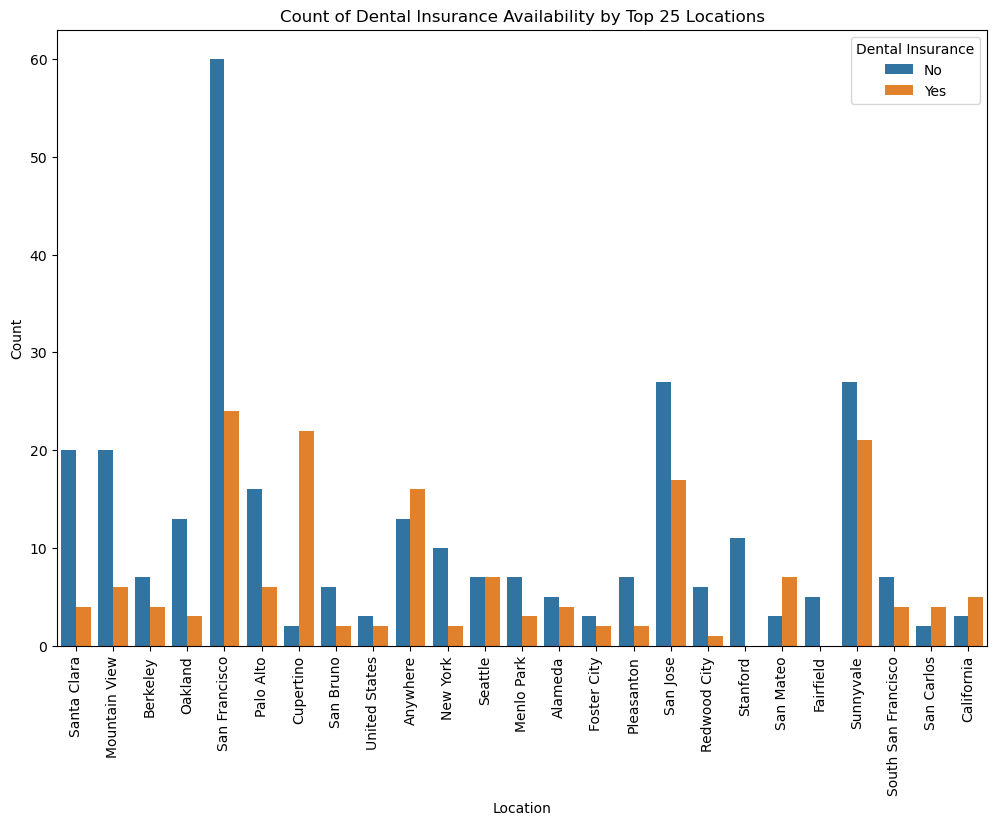

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for Dental Insurance across the top 25 locations
plt.figure(figsize=(12, 8))
sns.countplot(x='location', hue='Dental_insurance', data=df_top_25)
plt.title('Count of Dental Insurance Availability by Top 25 Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate location labels for better readability
plt.legend(title='Dental Insurance', labels=['No', 'Yes'])
plt.show()


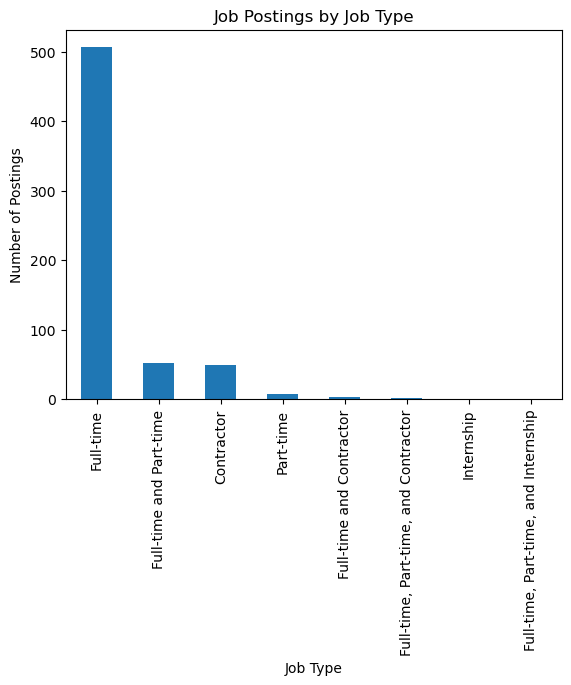

In [29]:
df['jobtype'].value_counts().plot(kind='bar')
plt.title('Job Postings by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Number of Postings')
plt.xticks(rotation=90)
plt.show()


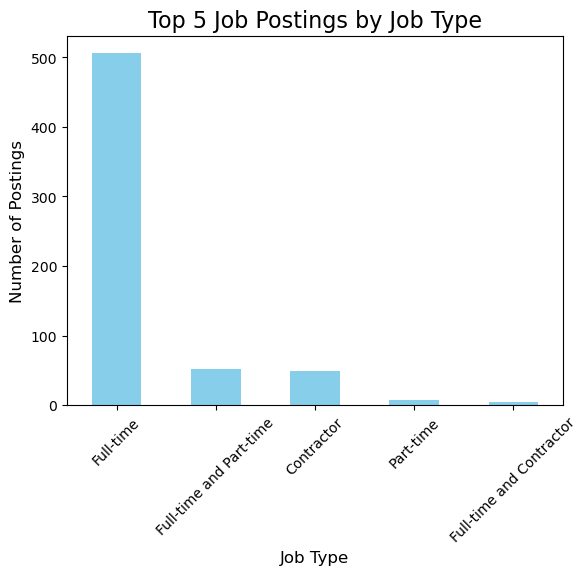

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each job type and get the top 3
top_job_types = df['jobtype'].value_counts().nlargest(5)

# Plotting
top_job_types.plot(kind='bar', color='skyblue')
plt.title('Top 5 Job Postings by Job Type', fontsize=16)
plt.xlabel('Job Type', fontsize=12)
plt.ylabel('Number of Postings', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [31]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 6.3 MB/s eta 0:00:00


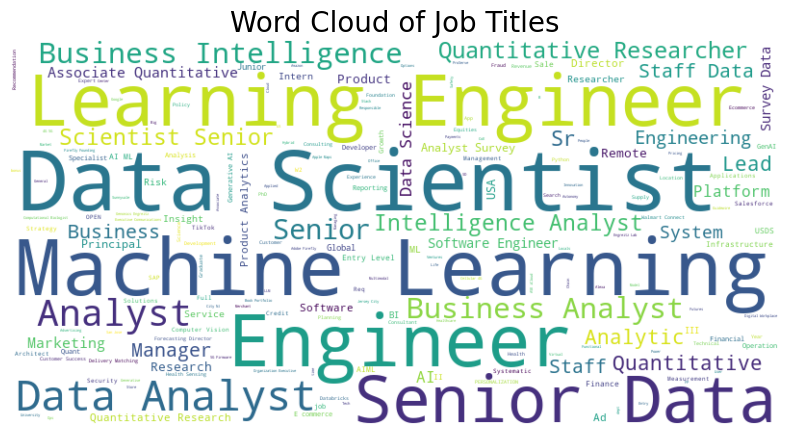

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all job titles into a single string
text = ' '.join(df['Job Title'].dropna())

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Job Titles', fontsize=20)
plt.show()


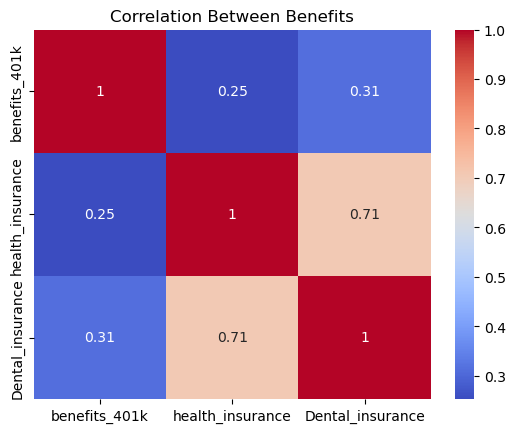

In [33]:
sns.heatmap(df[['benefits_401k', 'health_insurance', 'Dental_insurance']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Benefits')
plt.show()


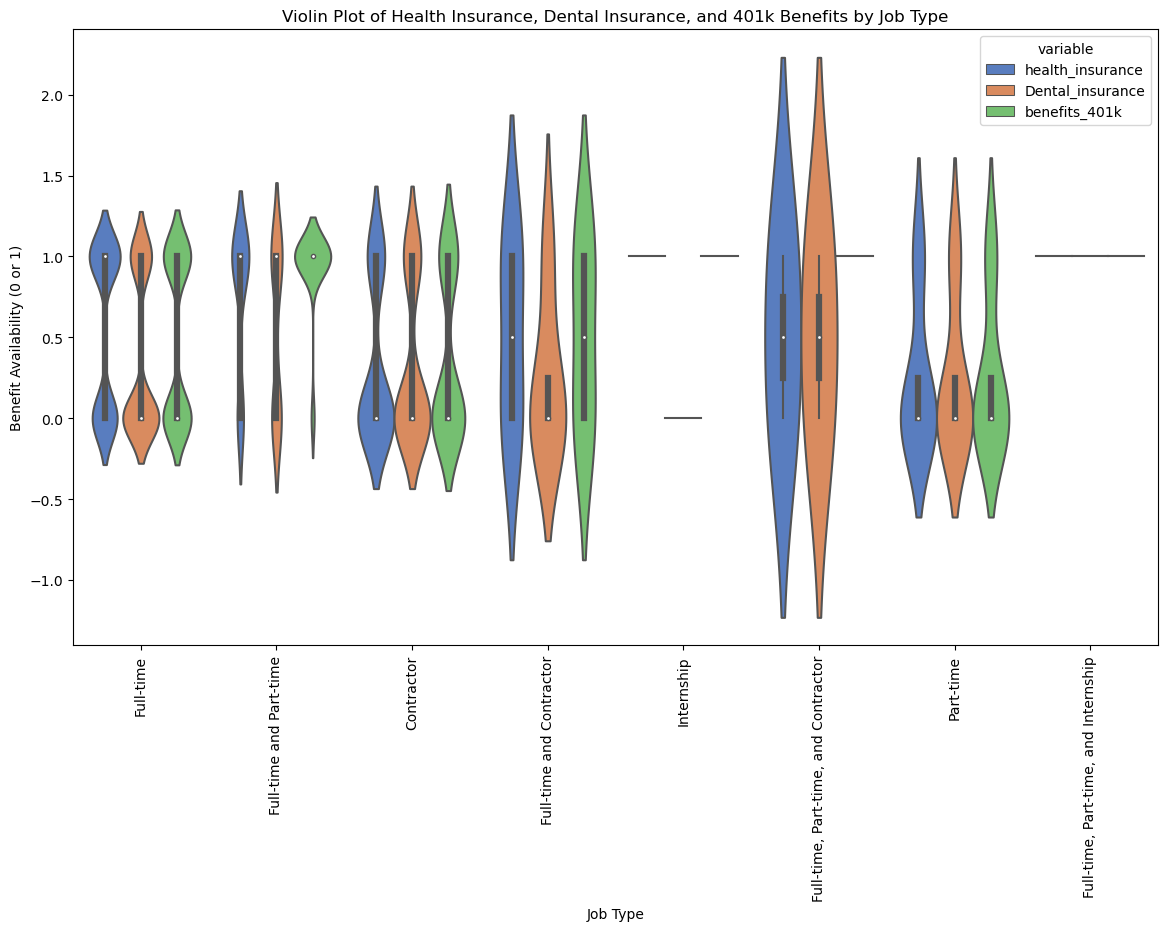

In [35]:
plt.figure(figsize=(14, 8))

# Create a violin plot without the split
sns.violinplot(
    x='jobtype', 
    y='value', 
    hue='variable', 
    data=df.melt(id_vars='jobtype', value_vars=['health_insurance', 'Dental_insurance', 'benefits_401k']),
    palette="muted"
)

plt.title('Violin Plot of Health Insurance, Dental Insurance, and 401k Benefits by Job Type')
plt.xticks(rotation=90)
plt.ylabel('Benefit Availability (0 or 1)')
plt.xlabel('Job Type')
plt.show()


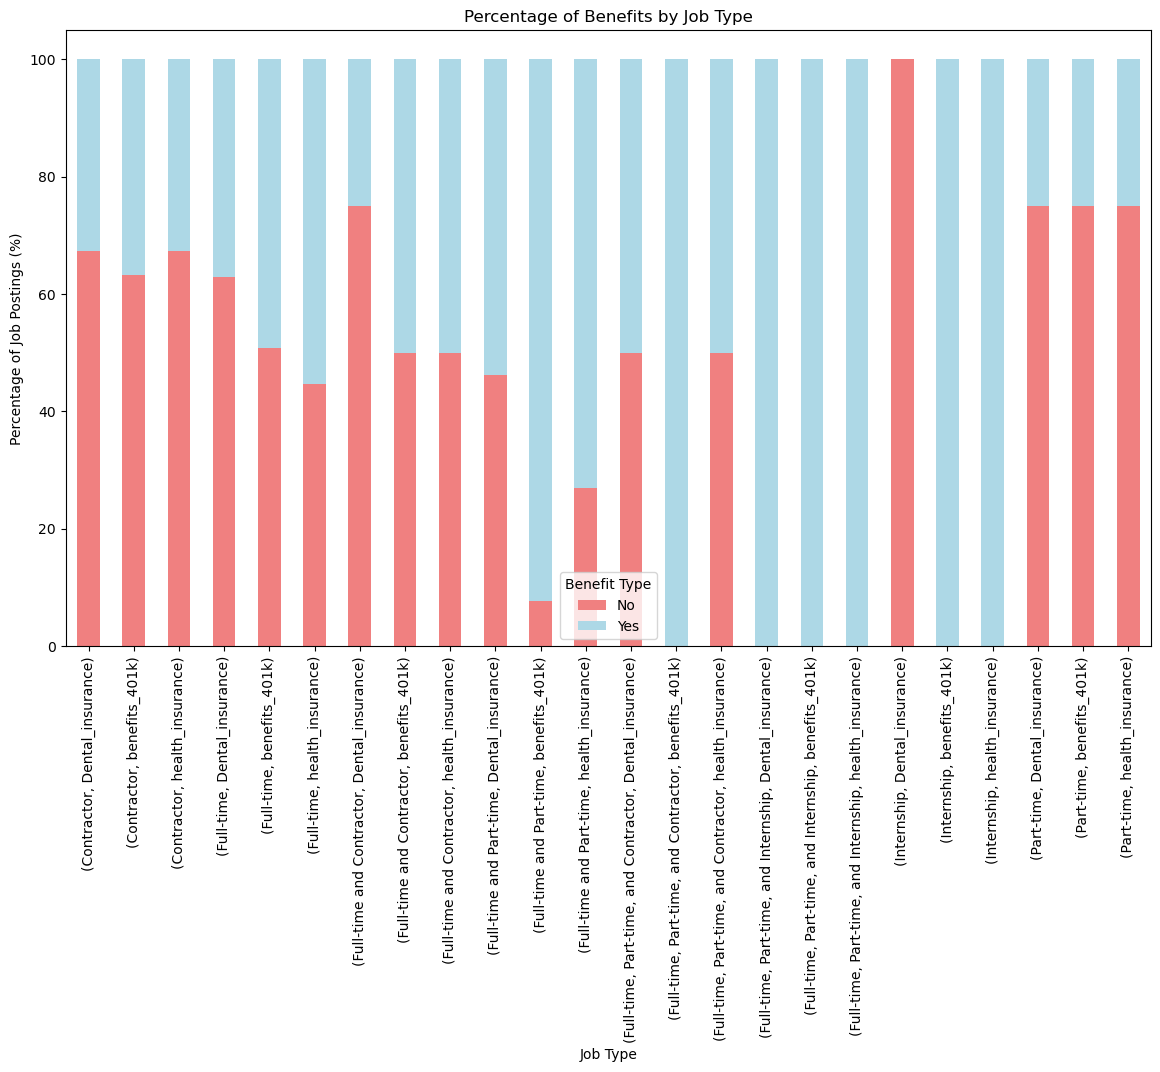

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined and contains your data

# Step 1: Melt the DataFrame
melted_df = df.melt(id_vars='jobtype', value_vars=['health_insurance', 'Dental_insurance', 'benefits_401k'])

# Step 2: Count occurrences of each benefit by job type
benefit_counts = melted_df.groupby(['jobtype', 'variable', 'value']).size().unstack(fill_value=0)

# Step 3: Calculate percentages
percentage_counts = benefit_counts.div(benefit_counts.sum(axis=1), axis=0) * 100

# Step 4: Plot the percentage counts as a stacked bar chart
percentage_counts.plot(kind='bar', stacked=True, figsize=(14, 8), color=['lightcoral', 'lightblue'])

plt.title('Percentage of Benefits by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Percentage of Job Postings (%)')
plt.xticks(rotation=90)
plt.legend(title='Benefit Type', labels=['No', 'Yes'])
plt.show()


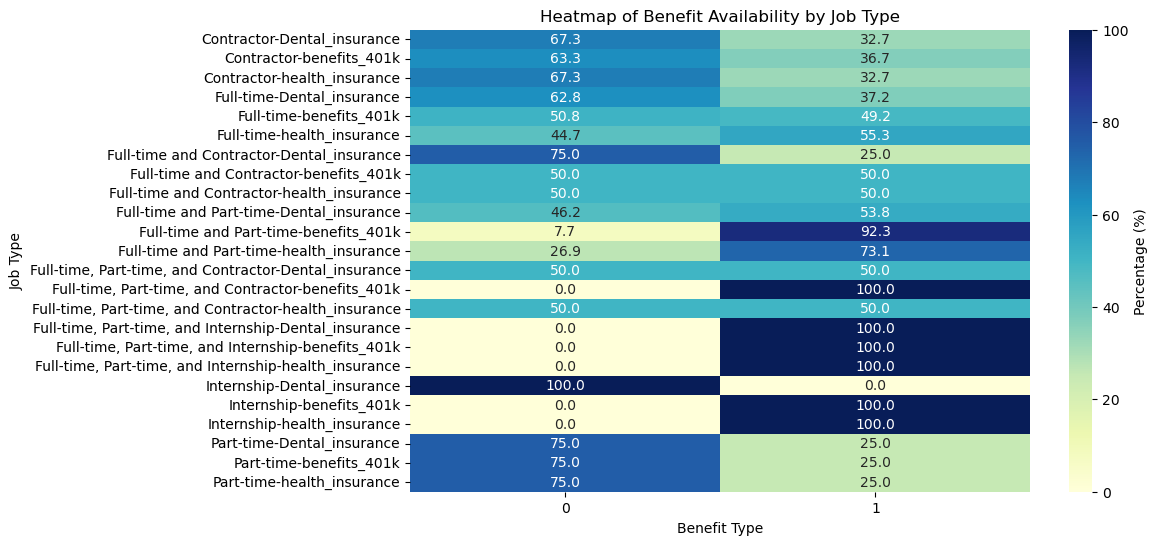

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(percentage_counts, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Percentage (%)'})

plt.title('Heatmap of Benefit Availability by Job Type')
plt.xlabel('Benefit Type')
plt.ylabel('Job Type')
plt.xticks(rotation=0)
plt.show()


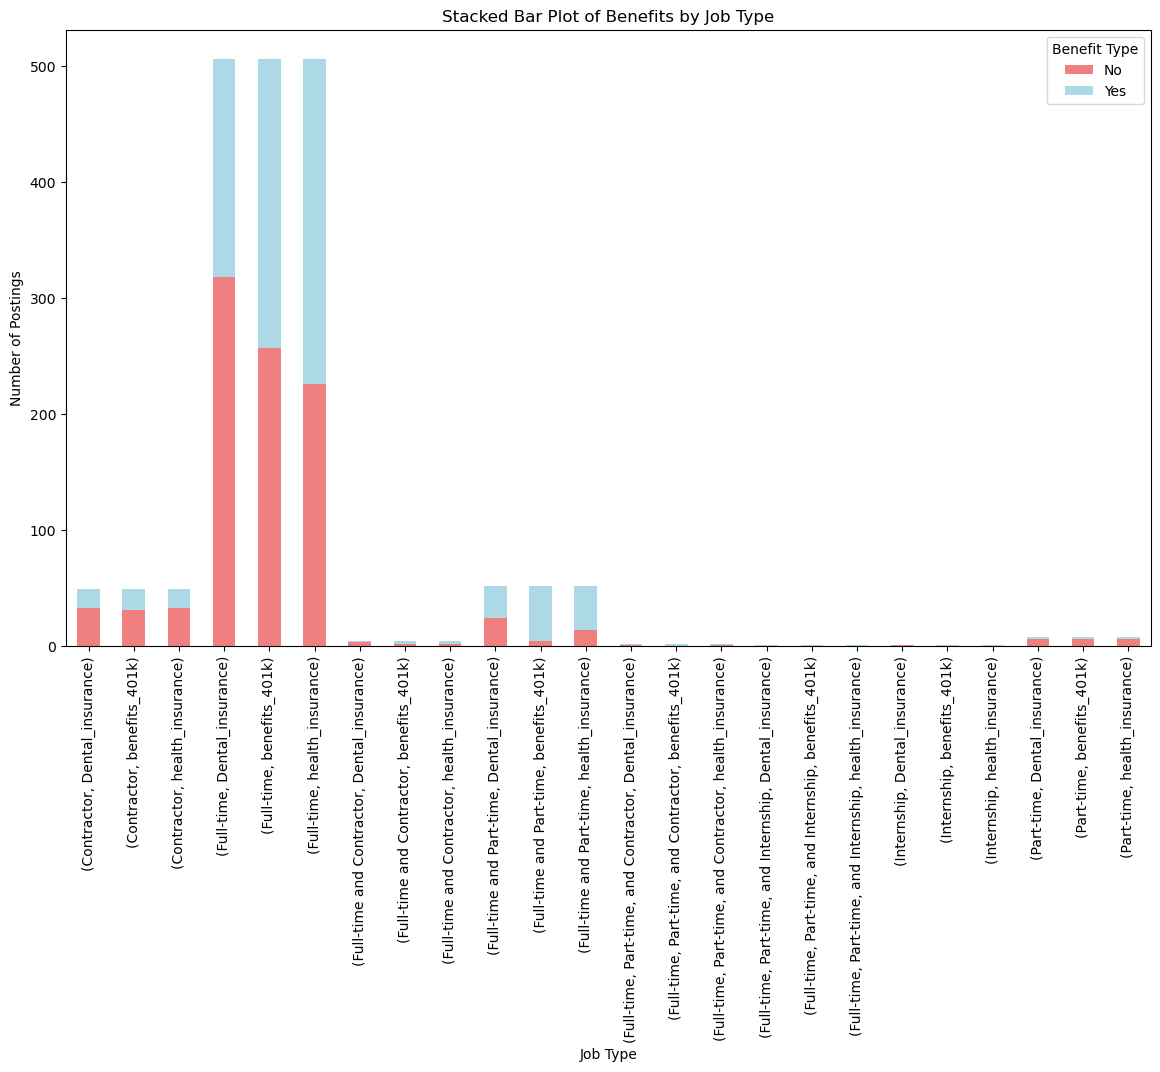

In [37]:
# Melt the DataFrame
melted_df = df.melt(id_vars='jobtype', value_vars=['health_insurance', 'Dental_insurance', 'benefits_401k'])

# Count occurrences of each benefit by job type
benefit_counts = melted_df.groupby(['jobtype', 'variable', 'value']).size().unstack(fill_value=0)

# Plot
benefit_counts.plot(kind='bar', stacked=True, figsize=(14, 8), color=['lightcoral', 'lightblue'])

plt.title('Stacked Bar Plot of Benefits by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Number of Postings')
plt.xticks(rotation=90)
plt.legend(title='Benefit Type', labels=['No', 'Yes'])
plt.show()


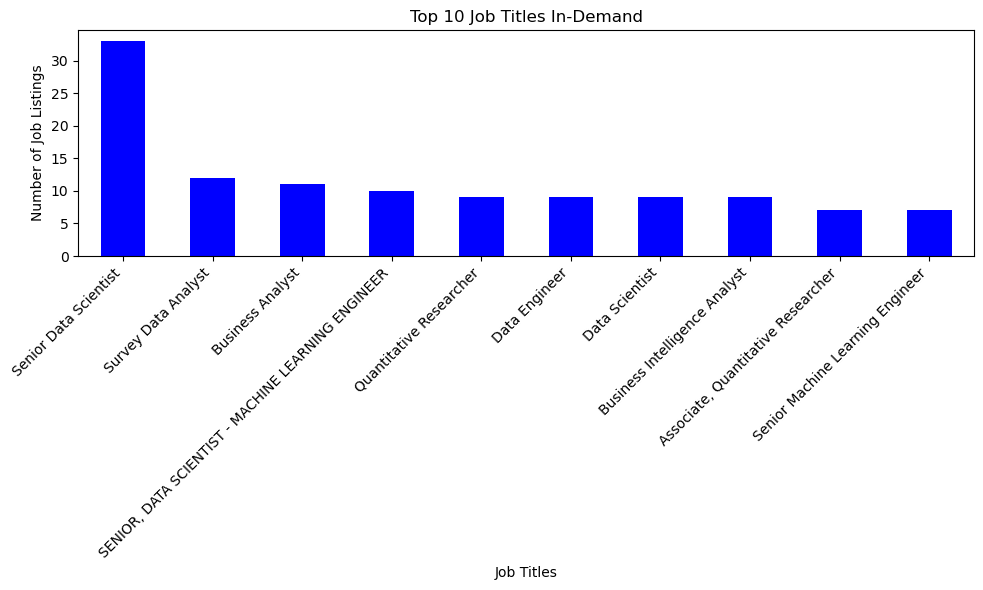

In [40]:
job_titles = df['Job Title'].str.strip()
job_title_counts = job_titles.value_counts()
#Top 10 most frequent job titles
plt.figure(figsize=(10,6))
job_title_counts.head(10).plot(kind='bar', color='b')
plt.title('Top 10 Job Titles In-Demand')
plt.xlabel('Job Titles')
plt.ylabel('Number of Job Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

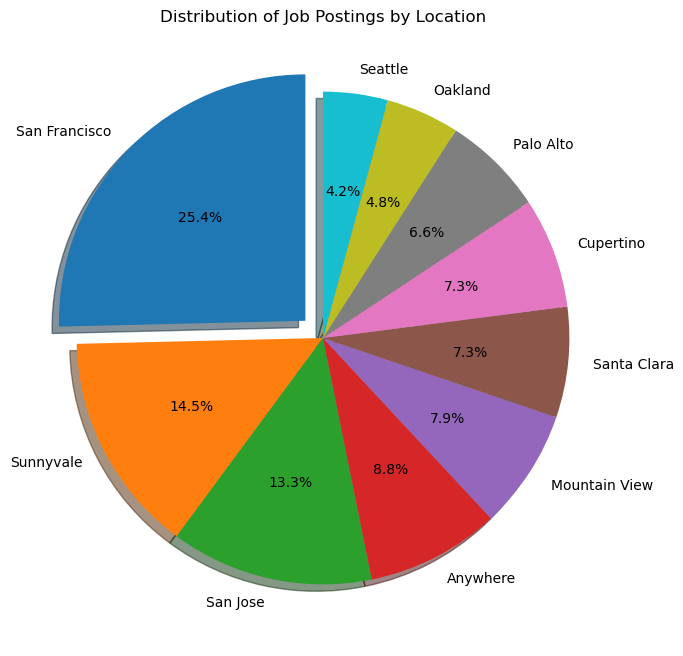

In [42]:
top_locations = df['location'].value_counts().head(10)
max_city = top_locations.idxmax()
explode = [0.1 if city == max_city else 0 for city in top_locations.index]
plt.figure(figsize=(8,8))
plt.pie(top_locations, labels=top_locations.index, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)
plt.title('Distribution of Job Postings by Location')
plt.show()

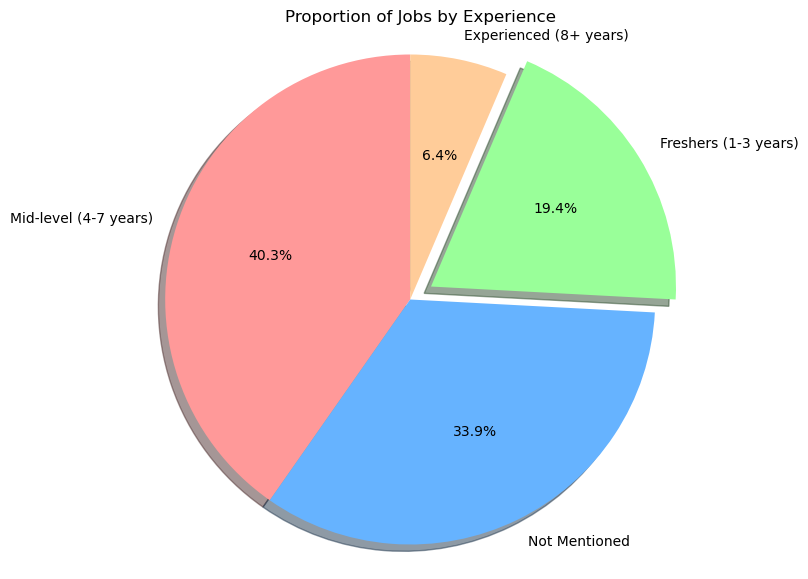

In [44]:
# Create a new column for experience categories
df['experience_category'] = pd.cut(df['years of experience'], 
                                     bins=[-1, 0, 3, 7, float('inf')], 
                                     labels=['Not Mentioned', 'Freshers (1-3 years)', 'Mid-level (4-7 years)', 'Experienced (8+ years)'])

# Count the number of jobs in each experience category
experience_counts = df['experience_category'].value_counts()

# Pie Chart: Proportion of jobs by experience category with freshers exploded
plt.figure(figsize=(7,7))

# Define explode: explode the 'Freshers (1-3 years)' slice
explode = [0.1 if label == 'Freshers (1-3 years)' else 0 for label in experience_counts.index]

# Plot the pie chart with the 'Freshers' slice exploded
experience_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'], explode=explode, shadow= True)
plt.title('Proportion of Jobs by Experience')
plt.ylabel('')  # Removes the default ylabel for better visualization
plt.axis('equal')  # Ensures the pie is drawn as a circle
plt.show()

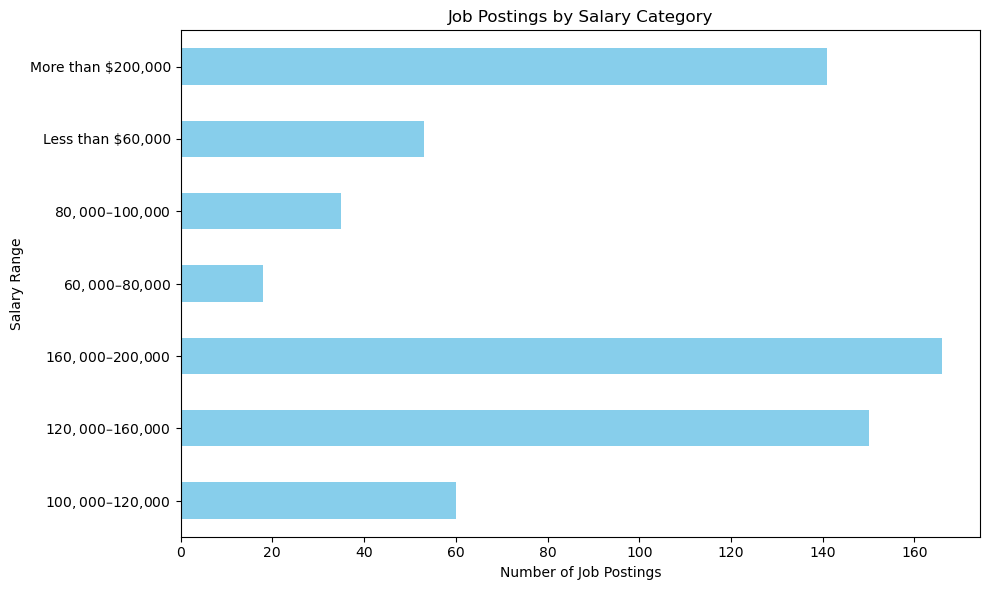

In [48]:
import re
# Calculate the average salary based on the 'lower_limit_salary' and 'upper_limit_salary'
df['average_salary'] = (df['lower_limit_salary'] + df['upper_limit_salary']) / 2

# Define a function to categorize salaries into bins
def categorize_salary(avg_salary):
    if avg_salary < 60000:
        return 'Less than $60,000'
    elif 60000 <= avg_salary < 80000:
        return '$60,000–$80,000'
    elif 80000 <= avg_salary < 100000:
        return '$80,000–$100,000'
    elif 100000 <= avg_salary < 120000:
        return '$100,000–$120,000'
    elif 120000 <= avg_salary < 160000:
        return '$120,000–$160,000'
    elif 160000 <= avg_salary < 200000:
        return '$160,000–$200,000'
    else:
        return 'More than $200,000'

# Apply the salary categorization function
df['salary_category'] = df['average_salary'].apply(categorize_salary)

# Count the occurrences of each salary category
salary_category_counts = df['salary_category'].value_counts().sort_index()

# Create a horizontal bar chart to show the salary distribution
plt.figure(figsize=(10,6))
salary_category_counts.plot(kind='barh', color='skyblue')
plt.title('Job Postings by Salary Category')
plt.xlabel('Number of Job Postings')
plt.ylabel('Salary Range')
plt.tight_layout()
plt.show()

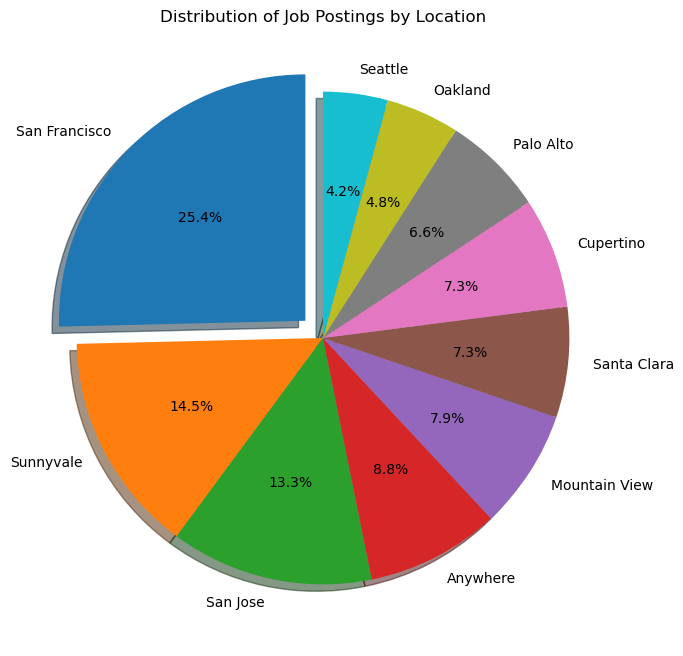

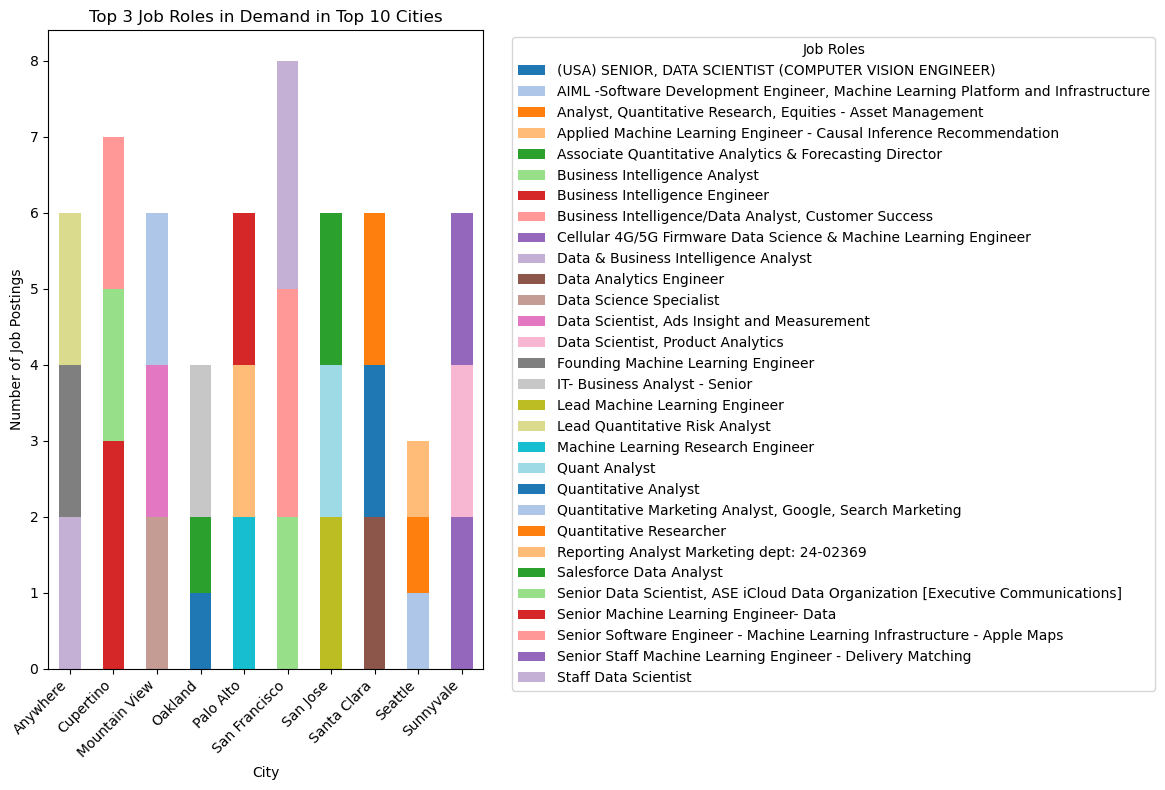

In [51]:
# Data preparation: Get the top 10 cities with the most job postings
top_locations = df['location'].value_counts().head(10)

# Pie chart for job postings by location
plt.figure(figsize=(8,8))
max_city = top_locations.idxmax()
explode = [0.1 if city == max_city else 0 for city in top_locations.index]

plt.pie(top_locations, labels=top_locations.index, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)
plt.title('Distribution of Job Postings by Location')
plt.show()

# Now, let's create the stacked bar chart for the top 3 job roles in each location
# Filter the data for only the top 10 cities
filtered_data = df[df['location'].isin(top_locations.index)]

# Group by location and job title to count job postings for each role in each city
city_job_counts = filtered_data.groupby(['location', 'Job Title']).size().reset_index(name='count')

# Sort by location and job count, then keep only the top 3 job roles per city
top_3_jobs_per_city = city_job_counts.sort_values('count', ascending=False).groupby('location').head(3)

# Pivot the data to prepare for the stacked bar chart
pivot_data = top_3_jobs_per_city.pivot(index='location', columns='Job Title', values='count').fillna(0)

# Plot a stacked bar chart showing top 3 job roles in demand in the top 10 cities
colors = plt.cm.tab20.colors  # Get a list of distinct colors
pivot_data.plot(kind='bar', stacked=True, figsize=(12,8), color=colors[:len(pivot_data.columns)])

plt.title('Top 3 Job Roles in Demand in Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Roles', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


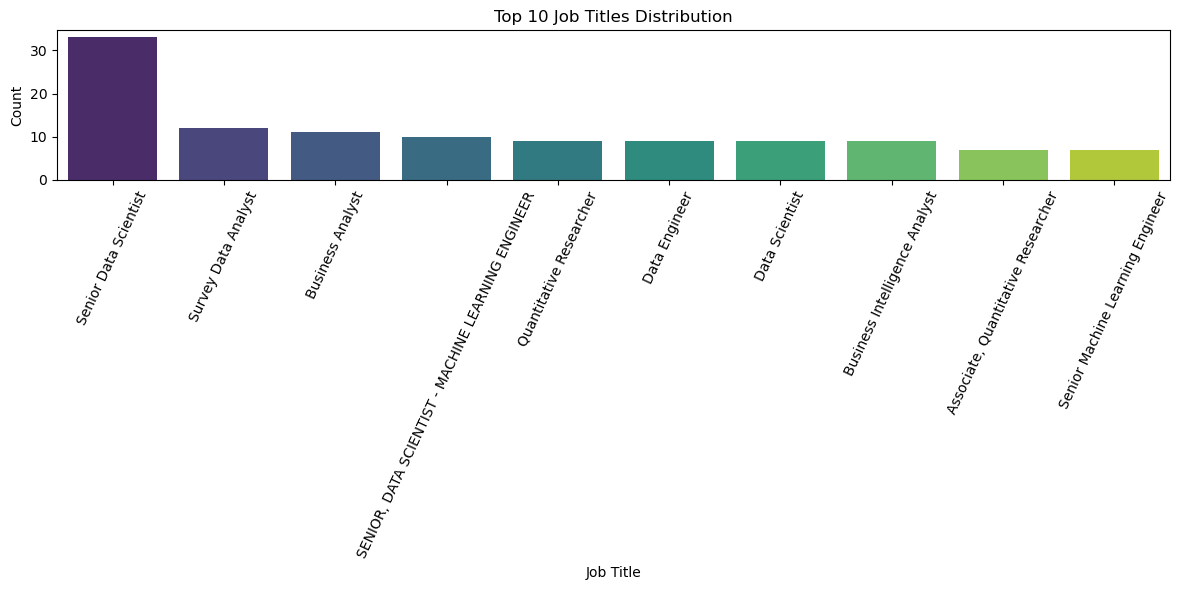

In [53]:
# Count the occurrences of each job title and get the top 10
job_title_counts = df['Job Title'].value_counts().nlargest(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=job_title_counts.index, y=job_title_counts.values, palette='viridis')
plt.xticks(rotation=65)
plt.title('Top 10 Job Titles Distribution')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

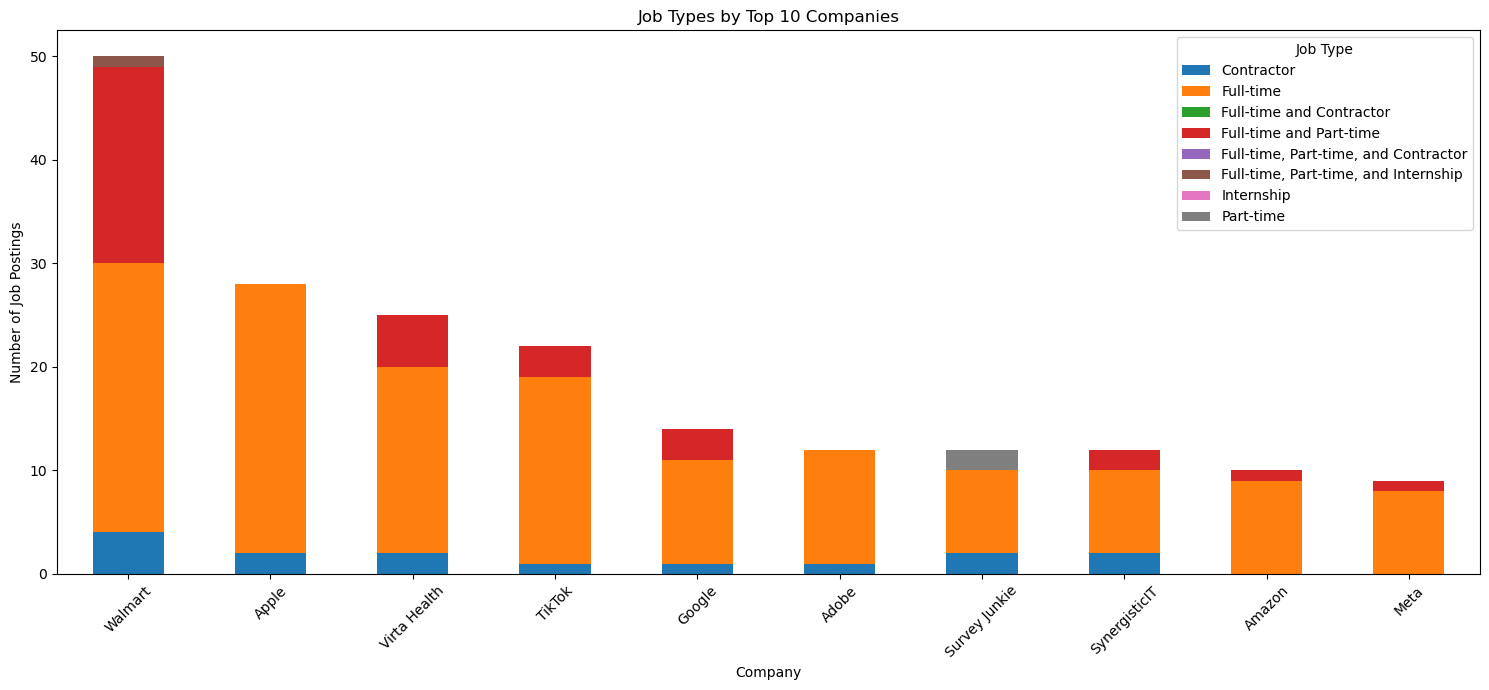

In [54]:
# Create a pivot table for job types by company
job_types_by_company = df.pivot_table(index='Company', columns='jobtype', values='Job Title', aggfunc='count', fill_value=0)

# Get the top 10 companies based on the total number of job postings
top_companies = job_types_by_company.sum(axis=1).nlargest(10).index
top_job_types_by_company = job_types_by_company.loc[top_companies]

# Plot
top_job_types_by_company.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Job Types by Top 10 Companies')
plt.xlabel('Company')
plt.ylabel('Number of Job Postings')
plt.legend(title='Job Type')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()